In [1]:
library(tidyverse)
library(ape)
library(aplot)
library(ggtree)
library(cowplot)
library(data.table)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


aplot v0.2.8 For help: https://github.com/YuLab-SMU/aplot/issues

If you use aplot in published research, please cite the paper:

Shuangbin Xu, Qianwen Wang, Shaodi Wen, Junrui Li, Nan He, Ming Li,
Thomas Hackl, Rui Wang, Dongqiang Zeng, Shixiang

In [2]:
path_to_input_file <- '../data/reference_length.tsv'

In [3]:
path_to_guide_tree <- '../data/phylogeny_49_species.nwk'

In [18]:
ref_len_df <- fread(path_to_input_file)

In [6]:
ref_len_df %>%
head()

reference,chr,contig_len,ref_len
<chr>,<chr>,<chr>,<int64>
Allenopithecus_nigroviridis,autosomes,< 1Mb,250827038
Allenopithecus_nigroviridis,autosomes,>= 1Mb,2407070482
Allenopithecus_nigroviridis,chrX,>= 1Mb,132264030
Aotus_nancymaae,autosomes,< 1Mb,149206485
Aotus_nancymaae,autosomes,>= 1Mb,2812013893
Aotus_nancymaae,chrX,>= 1Mb,136682344


In [8]:
# adding the length of the PAR to the length of chrX
ref_len_df_PAR_collapsed <- ref_len_df %>%
mutate(contig_len = ifelse(chr == 'PAR', '>= 1Mb', contig_len)) %>%
mutate(chr = ifelse(chr == 'PAR', 'chrX', chr)) %>%
group_by(reference, chr, contig_len) %>%
summarise(ref_len = sum(ref_len))

`summarise()` has grouped output by 'reference', 'chr'. You can override using the `.groups` argument.


In [9]:
ref_len_plots <- lapply(c('autosomes', 'chrX'), function(chrom){
    p <- ref_len_df_PAR_collapsed %>%
        filter(chr == chrom) %>%
        
        ggplot(aes(reference, ref_len, fill = contig_len)) + 
            geom_col() +  
            scale_fill_manual(values = c('#1e81b0', 'darkorange')) +
            coord_flip() + 
            theme_tree2() +
            ggtitle(chrom)+
            theme(legend.title=element_blank(),
                 legend.text = element_text(size=12),
                 legend.position="none")

    return(p)
})

In [10]:
chrom <- 'chrY'
p_chrY <- ref_len_df_PAR_collapsed %>%
        filter(chr == chrom) %>%
        
        ggplot(aes(reference, ref_len, fill = contig_len)) + 
            geom_col() +  
            scale_fill_manual(values = c('#1e81b0', 'darkorange')) +
            coord_flip() + 
            theme_tree2() +
            ggtitle(chrom)+
            theme(legend.title=element_blank(),
                 legend.text = element_text(size=12))

In [11]:
ref_len_plots[[3]] <- p_chrY

In [ ]:
# preparing the tree

In [13]:
guide_tree <- read.tree(path_to_guide_tree)

In [14]:
guide_tree_clado <- compute.brlen(guide_tree, method = "cladogram")

In [15]:
tree <- ggtree(guide_tree_clado) +
    geom_tiplab(size=4, align=TRUE, linesize=.5) + 
    xlim_tree(6)+
    theme_tree2() +
    theme(axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.line=element_blank(),
         legend.position="none")

tree <- flip(tree, 55, 70) %>% flip(23, 77)

Don't know how to automatically pick scale for object of type <integer64>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <integer64>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <integer64>. Defaulting to continuous.


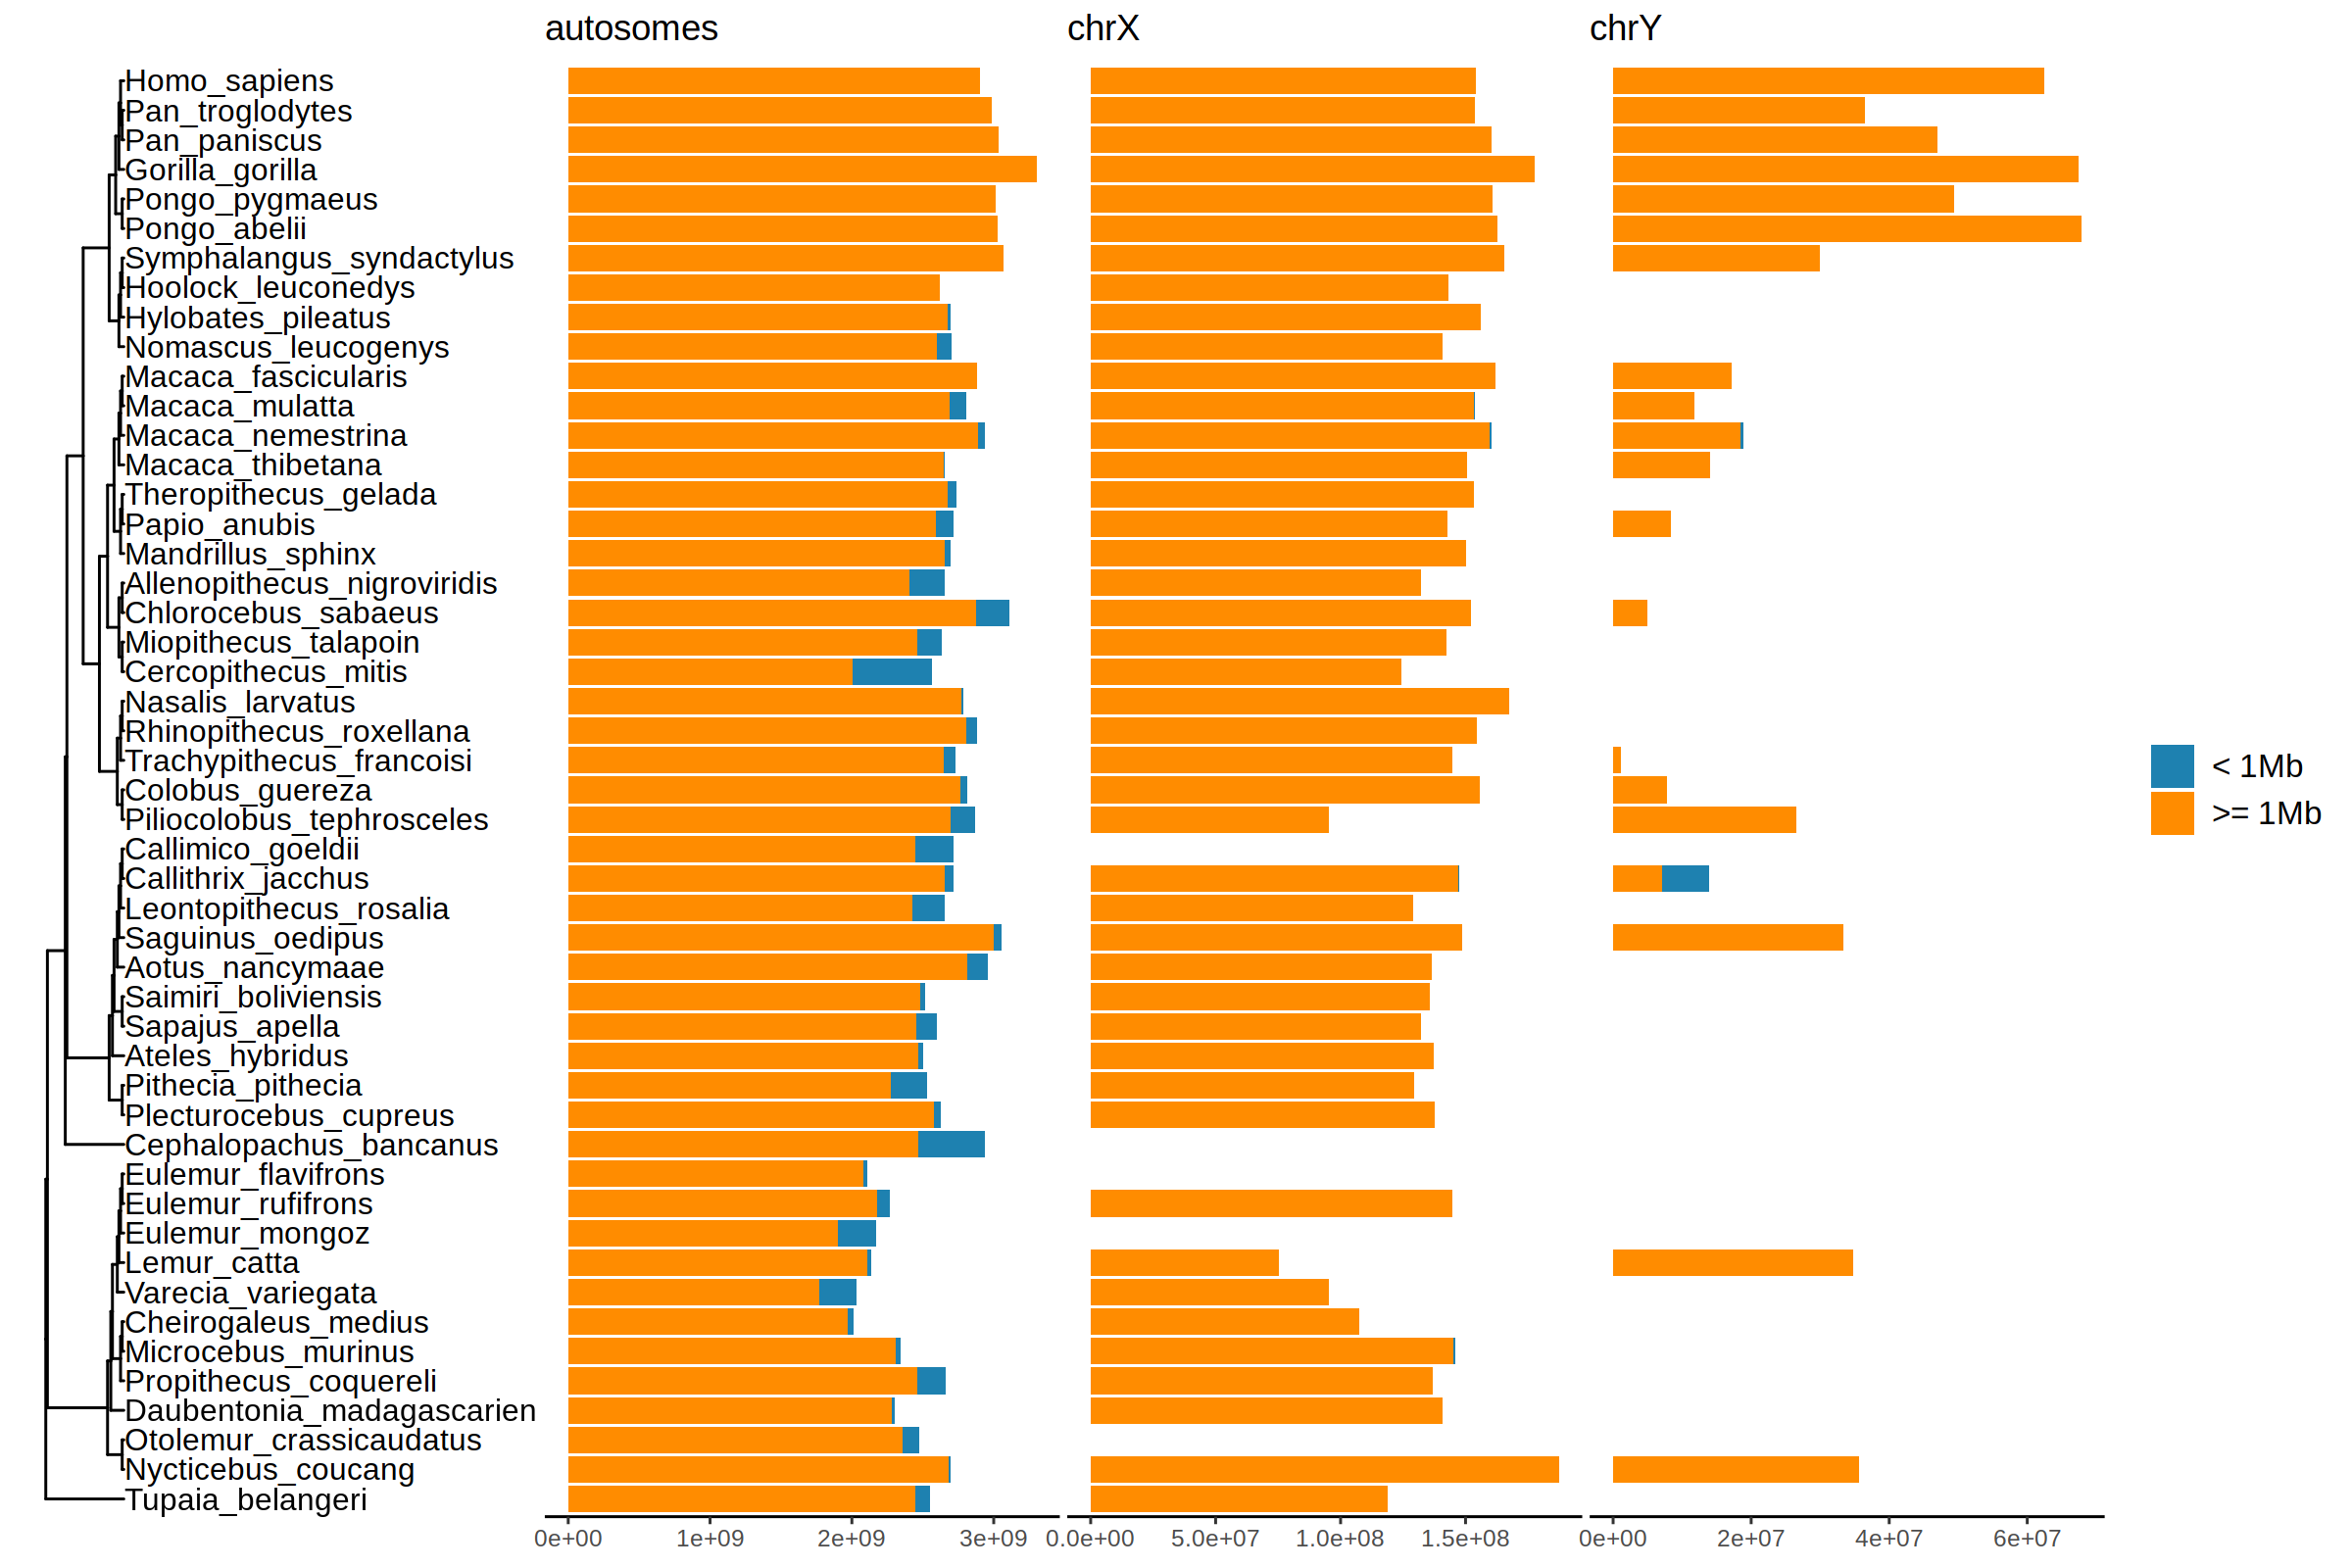

In [16]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 200)

ref_len_plots[[1]] %>% insert_left(tree) %>% insert_right(ref_len_plots[[2]]) %>% insert_right(ref_len_plots[[3]])

In [22]:
pdf('references_length.pdf', 
    width = 13, 
    height = 8)
ref_len_plots[[1]] %>% insert_left(tree) %>% insert_right(ref_len_plots[[2]]) %>% insert_right(ref_len_plots[[3]]) 
dev.off()

Don't know how to automatically pick scale for object of type <integer64>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <integer64>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <integer64>. Defaulting to continuous.


pdf 
  2